## Movie Ratings & Revenue Analysis

This notebook performs detailed data cleaning and exploratory analysis using a dataset of 1000 top movies with features such as rating, votes, revenue, genre, and more.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
movies = pd.read_csv(r"IMDB_Movie_Data.csv")
movies.columns = movies.columns.str.strip()  # Remove any leading/trailing spaces
movies.rename(columns={
    "Revenue (Millions)": "revenue",
    "Runtime (Minutes)": "runtime"
}, inplace=True)

# Quick overview
movies.head()


,Rank,Title,Genre,Description,Director,Actors,Year,runtime,Rating,Votes,revenue,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [5]:
# Dataset info
movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         1000 non-null   int64  
 1   Title        1000 non-null   object 
 2   Genre        1000 non-null   object 
 3   Description  1000 non-null   object 
 4   Director     1000 non-null   object 
 5   Actors       1000 non-null   object 
 6   Year         1000 non-null   int64  
 7   runtime      1000 non-null   int64  
 8   Rating       1000 non-null   float64
 9   Votes        1000 non-null   int64  
 10  revenue      872 non-null    float64
 11  Metascore    936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [6]:
# Handle missing values
movies.dropna(subset=["revenue", "Metascore"], inplace=True)


In [7]:
# Feature engineering
movies["Revenue Category"] = pd.qcut(movies["revenue"], q=4, labels=["Low", "Medium", "High", "Very High"])


In [8]:
movies.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,runtime,Rating,Votes,revenue,Metascore,Revenue Category
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Very High
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Very High


### Average Rating by Genre

In [10]:
genre_rating = movies.groupby("Genre")["Rating"].mean().sort_values().reset_index().sort_values(by="Rating", ascending = False).head(10)

In [11]:
genre_rating

,Genre,Rating
188,"Animation,Drama,Fantasy",8.6
187,"Drama,Family,Music",8.5
186,"Drama,Western",8.4
185,"Adventure,Drama,Sci-Fi",8.3
184,"Adventure,Drama,War",8.3
183,"Drama,Mystery,War",8.2
182,"Biography,Comedy,Crime",8.2
181,"Drama,Fantasy,War",8.2
180,"Comedy,Drama,Thriller",8.1
179,"Drama,History",8.1


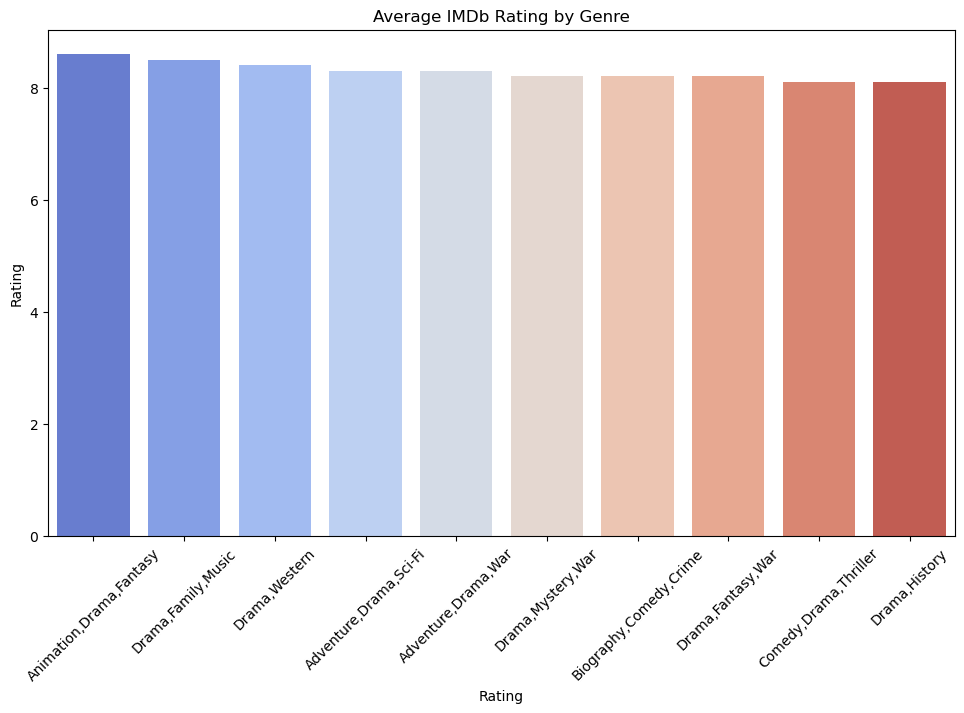

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x=genre_rating.Genre, y=genre_rating.Rating, palette="coolwarm")
plt.title("Average IMDb Rating by Genre")
plt.xlabel("Rating")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


### Total Revenue by Year

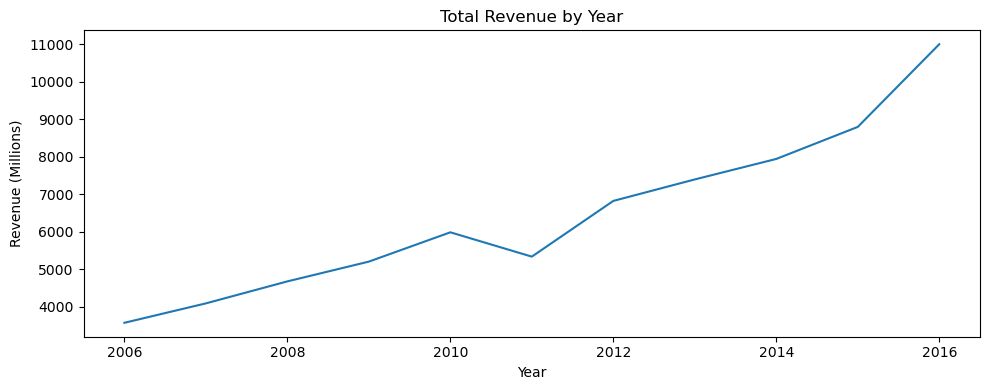

In [14]:
rev_year = movies.groupby("Year")["revenue"].sum()
plt.figure(figsize=(10,4))
sns.lineplot(x=rev_year.index, y=rev_year.values)
plt.title("Total Revenue by Year")
plt.ylabel("Revenue (Millions)")
plt.tight_layout()
plt.show()


### Correlation Heatmap

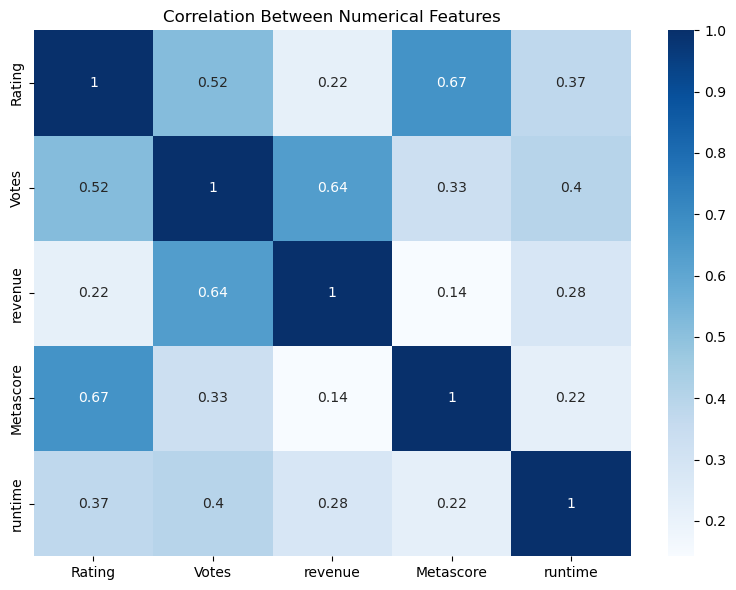

In [16]:
corr = movies[["Rating", "Votes", "revenue", "Metascore", "runtime"]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Between Numerical Features")
plt.tight_layout()
plt.show()


## Runtime vs Rating

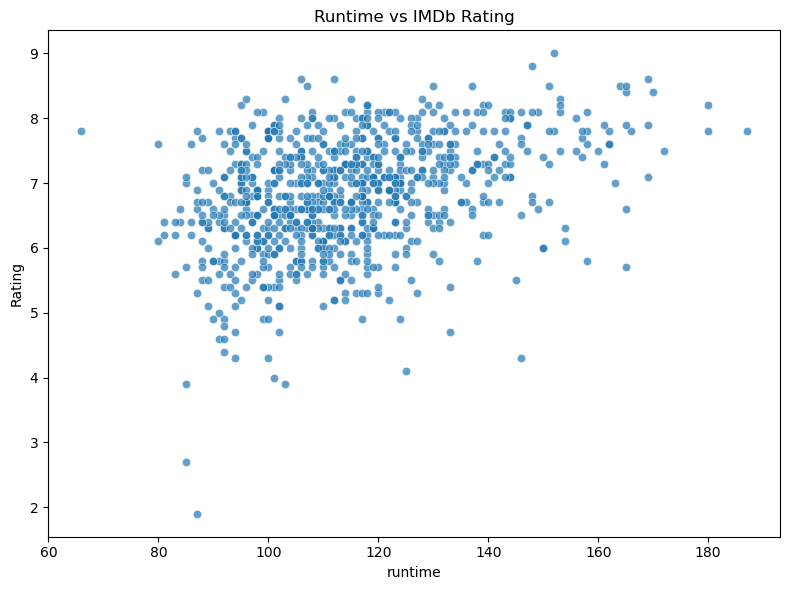

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=movies, x="runtime", y="Rating",  alpha=0.7)
plt.title("Runtime vs IMDb Rating")
plt.tight_layout()
plt.show()


### Votes vs Rating

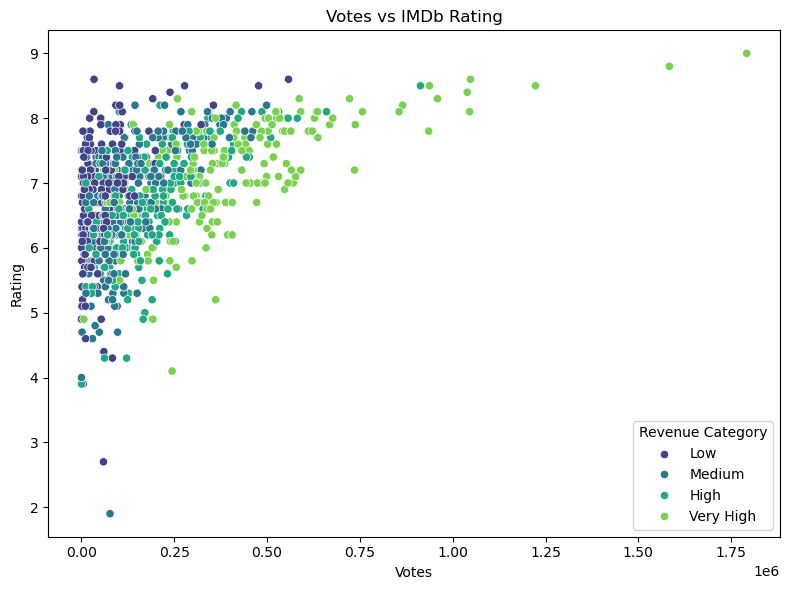

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=movies, x="Votes", y="Rating", hue="Revenue Category", palette="viridis")
plt.title("Votes vs IMDb Rating")
plt.tight_layout()
plt.show()


### Top 10 Movies by Rating

In [22]:
top_10 = movies.sort_values(by="Rating", ascending=False).head(10)
top_10[["Title", "Genre", "Rating", "Votes", "revenue", "Metascore"]]


,Title,Genre,Rating,Votes,revenue,Metascore
54,The Dark Knight,"Action,Crime,Drama",9.0,1791916,533.32,82.0
80,Inception,"Action,Adventure,Sci-Fi",8.8,1583625,292.57,74.0
36,Interstellar,"Adventure,Drama,Sci-Fi",8.6,1047747,187.99,74.0
249,The Intouchables,"Biography,Comedy,Drama",8.6,557965,13.18,57.0
96,Kimi no na wa,"Animation,Drama,Fantasy",8.6,34110,4.68,79.0
124,The Dark Knight Rises,"Action,Thriller",8.5,1222645,448.13,78.0
991,Taare Zameen Par,"Drama,Family,Music",8.5,102697,1.20,42.0
133,Whiplash,"Drama,Music",8.5,477276,13.09,88.0
99,The Departed,"Crime,Drama,Thriller",8.5,937414,132.37,85.0
476,The Lives of Others,"Drama,Thriller",8.5,278103,11.28,89.0


In [26]:
# Save cleaned dataset
movies.to_csv(r"C:\Users\DELL\Desktop\Mike work\movies.csv", index=False)
print("Cleaned dataset saved successfully.")


Cleaned dataset saved successfully.
